# Linear Regression

A regression model is given by the function $\hat{y}_i= \beta^T x_i + v$ where $x$ contains the input, $\hat{y}$ is the prediction, $\beta$ is a weight vector, and $v$ is an offset.

In least-squares linear regression, we want to minimize the cost $\Vert y_i - \hat{y}_i \Vert_2^2$ with respect to the parameters $\beta$ and $v$.

## Example

This example will show how to implement a linear regression model usinging sci-kit learn. For this example, we are going to have a one-dimensional input spread uniformly from 0 to 10, and train our regression model on an output of values perturbed sligthtly from a line $y = mx + b$.

First, we import the packages we need

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cvxpy as cp

/Users/Abraham/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Next, we define an objective function which is just the sum of a least squares loss function.

In [2]:
def objective_fn(X, Y, beta, intercept):
    
    return cp.pnorm(cp.matmul(X, beta) + intercept - Y, p=2)**2

def mse(X, Y, beta, intercept):
    return (1.0 / X.shape[0]) * objective_fn(X, Y, beta, intercept).value

Next we create our dataset. For this example to make it easier to visualize at the end, we will stick with a 1-D input and small noise. To change the number of points, the dimension, or the noise, change m, n, and sigma respectively.

In [20]:
def generate_data(m=100, n=20, sigma=5):
    #Generates data matrix X and observations Y
    np.random.seed(1)
    beta_star = np.random.randn(n)
    intercept_star = np.random.randn()
    # Generate an ill-conditioned data matrix
    X = np.random.randn(m, n)
    # Corrupt the observations with additive Gaussian noise
    Y = X.dot(beta_star) + intercept_star + np.random.normal(0, sigma, size=m)
    return X, Y

m = 100
n = 1
sigma = .3

X, Y = generate_data(m, n, sigma)
X_train = X[:50, :]
Y_train = Y[:50]
X_test = X[50:, :]
Y_test = Y[50:]

Next, we fit our model using CVXPY

In [21]:
beta = cp.Variable(n)
intercept = cp.Variable()

cost = cp.pnorm(cp.matmul(X_train, beta) + intercept - Y_train, p=2)**2

problem = cp.Problem(cp.Minimize(cost))

problem.solve()

train_error = mse(X_train, Y_train, beta, intercept)
test_error = mse(X_test, Y_test, beta, intercept)
beta_value = beta.value


Next, we graph our results, the blue line representing our model and the red dots representing the actual input.

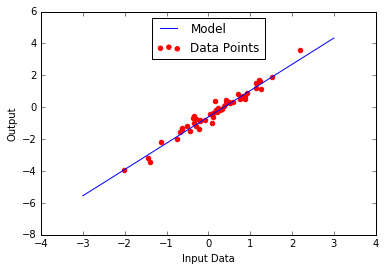

In [22]:
%matplotlib inline

plt.plot([-3,3],[-3*beta_value[0] + intercept.value,3*beta_value[0] + intercept.value], label='Model')
plt.scatter(X_test,Y_test, color = 'red', label='Data Points')
plt.legend(loc='upper center')
plt.xlabel("Input Data")
plt.ylabel("Output")
plt.show()